# Object Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd "/content/drive/MyDrive/crop_disease"

/content/drive/MyDrive/crop_disease


## Cloning YOLOv5 Model

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 13175, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 13175 (delta 97), reused 137 (delta 69), pack-reused 13002
Receiving objects: 100% (13175/13175), 12.73 MiB | 6.86 MiB/s, done.
Resolving deltas: 100% (9008/9008), done.


In [ ]:
!pip install -U -r yolov5/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.0 MB/s 
     |████████████████████████████████| 3.1 MB 49.4 MB/s 
     |████████████████████████████████| 596 kB 35.8 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 1.0 MB 70.8 MB/s 
     |████████████████████████████████| 5.9 MB 46.5 MB/s 
     |████████████████████████████████| 793 kB 71.7 MB/s 
     |████████████████████████████████| 281 kB 74.4 MB/s 
     |████████████████████████████████| 947 kB 70.2 MB/s 
     |████████████████████████████████| 1.1 MB 72.9 MB/s 
     |████████████████████████████████| 1.6 MB 50.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7

## Check Version of Torch & Properties of cuda device

In [ ]:
import torch

print('torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

torch 1.12.1+cu113 _CudaDeviceProperties(name='Tesla P100-PCIE-16GB', major=6, minor=0, total_memory=16280MB, multi_processor_count=56)


## Path extraction of images & Write on text file

In [ ]:
from glob import glob

%cd "/content/drive/MyDrive/crop_disease/"

# 이미지 경로 list로 넣기
train_img_list = glob('./train/images/*.jpg') + glob('./train/images/*.jpeg')
valid_img_list = glob('./valid/images/*.jpg') + glob('./valid/images/*.jpeg')
#test_img_list = glob('./test/images/*.jpg') + glob('./test/images/*.jpeg')


# txt 파일에 write
with open('./train.txt', 'w') as f:
	f.write('\n'.join(train_img_list) + '\n')
    
with open('./valid.txt', 'w') as f:
	f.write('\n'.join(valid_img_list) + '\n')
 
# with open('./test.txt', 'w') as f:
# 	f.write('\n'.join(test_img_list) + '\n')

/content/drive/MyDrive/crop_disease


## Model(YOLOv5m) Train

In [ ]:
!python /content/drive/MyDrive/crop_disease/yolov5/train.py --img 640 --batch 16 --epochs 150 --data /content/drive/MyDrive/crop_disease/data.yaml --weights yolov5m.pt --name crop_disease_diagnosis_train --cfg /content/drive/MyDrive/crop_disease/yolov5/models/yolov5m.yaml

train: weights=yolov5s.pt, cfg=/content/drive/MyDrive/crop_disease/yolov5/models/yolov5s.yaml, data=/content/drive/MyDrive/crop_disease/data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=crop_disease_diagnosis_train, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 2 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.1-400-gfd004f5 Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.93

## Save Trained Model

In [ ]:
!cp -r /content/drive/MyDrive/crop_disease/yolov5/runs/train/crop_disease_diagnosis_train3 /content/drive/MyDrive/crop_disease

## Detect the Non-Crop Test Image with Trained Model

In [ ]:
!python /content/drive/MyDrive/crop_disease/yolov5/detect.py --weights /content/drive/MyDrive/crop_disease/yolov5/models/best_weight.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/crop_disease/yolov5/mousepad.jpg

detect: weights=['/content/drive/MyDrive/crop_disease/yolov5/models/best_weight.pt'], source=/content/drive/MyDrive/crop_disease/yolov5/mousepad.jpg, data=drive/MyDrive/crop_disease/yolov5/data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=drive/MyDrive/crop_disease/yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
requirements: ipython not found and is required by YOLOv5, attempting auto-update...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/drive/MyDrive/crop_disease/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v6.2-10-g5c854fa Python-3.7.13 tor

## Show the Detected Image with bounding boxes

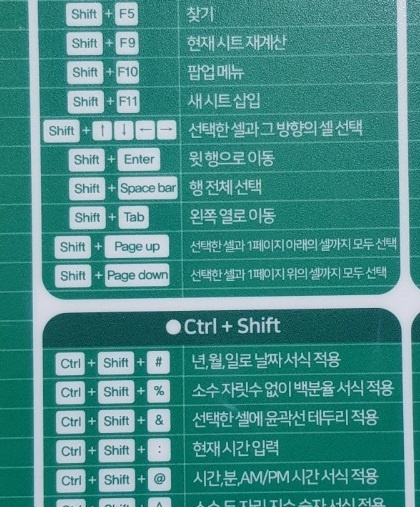

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img1 = cv2.imread('/content/drive/MyDrive/crop_disease/yolov5/runs/detect/exp/mousepad.jpg')
cv2_imshow(img1)

## Detect the Crop-Disease Test Image with Trained Model

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/train_tomato/weights/best_weight.pt --img 640 --conf 0.25 --source /content/drive/MyDrive/plant_dataset/tomato_disease/test_self/2.jpg

detect: weights=['/content/yolov5/runs/train/train_tomato/weights/best.pt'], source=/content/drive/MyDrive/plant_dataset/tomato_disease/test_self/2.jpg, data=../../../../../yolov5/data/coco128.yaml, imgsz=[320, 320], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=../../../../../yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-391-g7639e4c Python-3.7.13 torch-1.12.1+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
YOLOv5x summary: 444 layers, 86180143 parameters, 0 gradients, 203.8 GFLOPs
image 1/1 /content/drive/.shortcut-targets-by-id/13fEMcT593Sp4K376ViXQznogdQQMtln1/plant_dataset/tomato_disease/test_self/2.jpg: 256x320 8 Leaf Molds, Done. (0.023s)
Speed: 0.2ms pre-process, 23.3ms inference, 1.6ms NMS per imag

## Show the Detected Image with bounding boxes

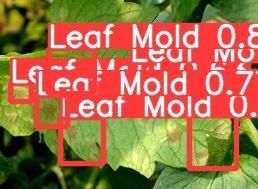

In [ ]:
img2 = cv2.imread('/content/yolov5/runs/detect/exp3/2.jpg')
cv2_imshow(img2)
